In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt  
from keras.models import load_model
model=load_model("vgg_best_model_lr-4_decay-60011_0.3238.hdf5")

C:\Users\Q\Anaconda2\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def grad_cam(path):    
    img_path = path
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("block5_conv3")    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) 
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    plt.imshow(img)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()

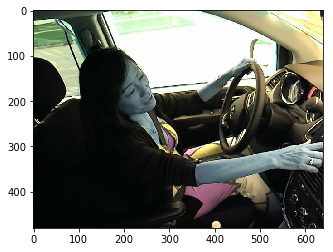

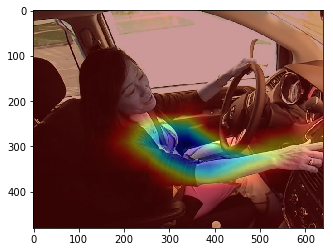

In [3]:
grad_cam("img_56.jpg")

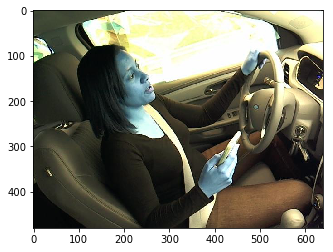

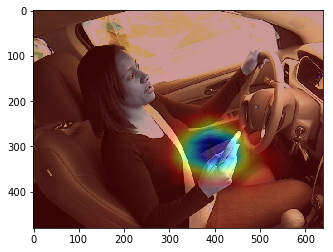

In [4]:
grad_cam("img_115.jpg")

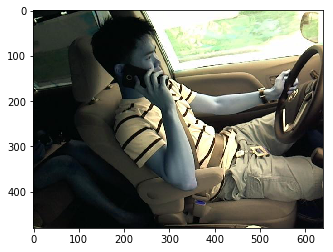

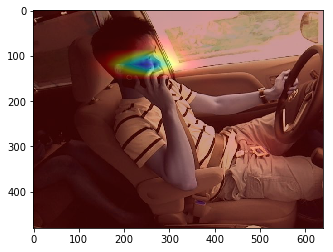

In [5]:
grad_cam("img_94.jpg")

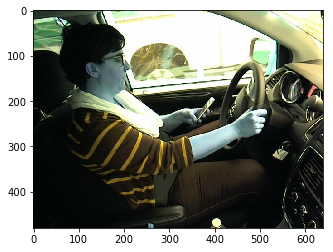

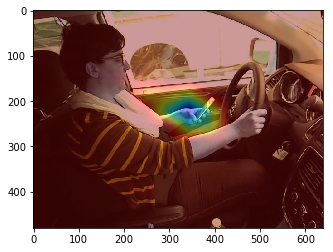

In [6]:
grad_cam("img_5.jpg")

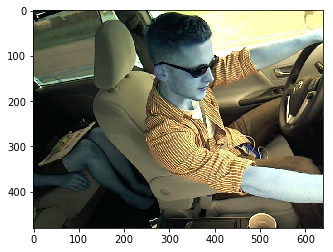

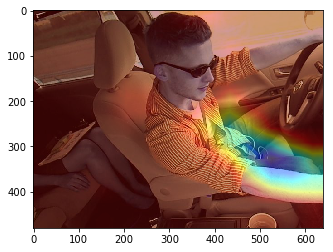

In [7]:
grad_cam("img_63.jpg")

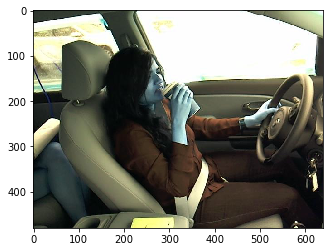

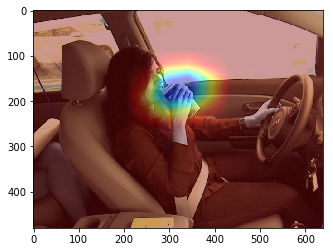

In [8]:
grad_cam("img_0.jpg")

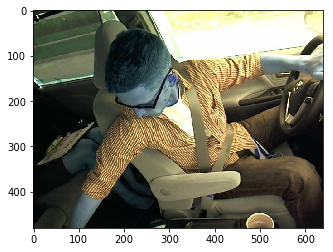

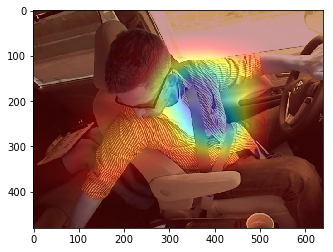

In [9]:
grad_cam("img_81.jpg")

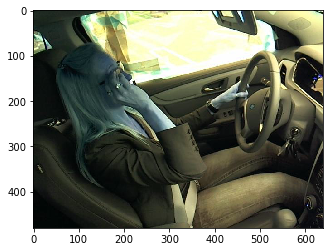

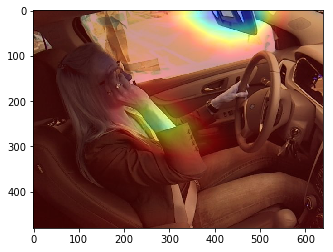

In [10]:
grad_cam("img_26.jpg")

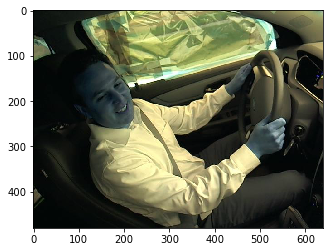

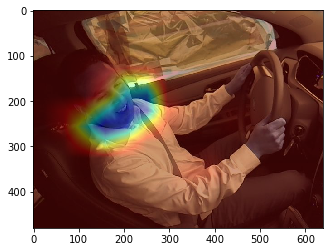

In [11]:
grad_cam("img_19.jpg")

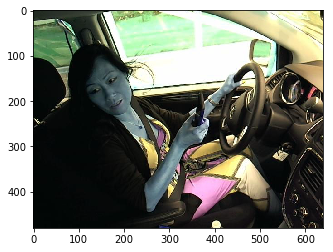

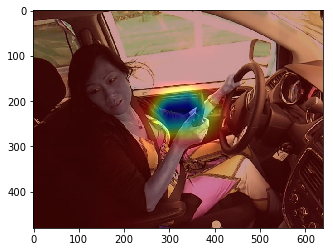

In [11]:
grad_cam("img_1407.jpg")